In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [14]:
pd.set_option('display.max_columns', None)

In [8]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [15]:
df = pd.read_csv('/content/drive/MyDrive/GymData/gym_members_exercise_tracking.csv')
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39


# Датасет: данные о посетителях спортзала
Age	Возраст  
Gender	Пол   
Weight (kg)	Вес (кг)  
Height (m)	Рост (м)  
Max_BPM	Максимальная частота сердцебиения   
Avg_BPM	Средняя частота сердцебиения   
Resting_BPM	Частота сердцебиения в состоянии покоя  
Session_Duration (hours)	Длительность сессии   
Calories_Burned	Сожжено калорий  
Workout_Type	Тип тренировки  
Fat_Percentage	Процент жира  
Water_Intake (liters)	Выпил воды (л)  
Workout_Frequency (days/week)	  
Experience_Level	Уровень опыта   
BMI Индекс массы тела  

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [11]:
df.describe()

,Age,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
count,973.000000,973.000000,973.00000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000,973.000000
mean,38.683453,73.854676,1.72258,179.883864,143.766701,62.223022,1.256423,905.422405,24.976773,2.626619,3.321686,1.809866,24.912127
std,12.180928,21.207500,0.12772,11.525686,14.345101,7.327060,0.343033,272.641516,6.259419,0.600172,0.913047,0.739693,6.660879
min,18.000000,40.000000,1.50000,160.000000,120.000000,50.000000,0.500000,303.000000,10.000000,1.500000,2.000000,1.000000,12.320000
25%,28.000000,58.100000,1.62000,170.000000,131.000000,56.000000,1.040000,720.000000,21.300000,2.200000,3.000000,1.000000,20.110000
50%,40.000000,70.000000,1.71000,180.000000,143.000000,62.000000,1.260000,893.000000,26.200000,2.600000,3.000000,2.000000,24.160000
75%,49.000000,86.000000,1.80000,190.000000,156.000000,68.000000,1.460000,1076.000000,29.300000,3.100000,4.000000,2.000000,28.560000
max,59.000000,129.900000,2.00000,199.000000,169.000000,74.000000,2.000000,1783.000000,35.000000,3.700000,5.000000,3.000000,49.840000


In [12]:
df.isnull().sum().sum()

0

In [13]:
df.duplicated().sum()

0

In [17]:
lb = LabelEncoder()
df['Gender'] = lb.fit_transform(df['Gender'])
df['Workout_Type'] = lb.fit_transform(df['Workout_Type'])
df.head()

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [25]:
df.rename(columns={
    "Weight (kg)":"kg",
    "Height (m)":"Height",
    "Resting_BPM":"Rest",
    "Session_Duration (hours)":"Dur",
    "Calories_Burned":"Kcal",
    "Workout_Type":"Type",
    "Fat_Percentage":"Fat",
    "Water_Intake (liters)":"Water",
    "Workout_Frequency (days/week)":"Freq",
    "Experience_Level":"Exp"
}, inplace=True)
df.head()

,Age,Gender,kg,Height,Max_BPM,Avg_BPM,Rest,Dur,Kcal,Type,Fat,Water,Freq,Exp,BMI
0,56,1,88.3,1.71,180,157,60,1.69,1313.0,3,12.6,3.5,4,3,30.20
1,46,0,74.9,1.53,179,151,66,1.30,883.0,1,33.9,2.1,4,2,32.00
2,32,0,68.1,1.66,167,122,54,1.11,677.0,0,33.4,2.3,4,2,24.71
3,25,1,53.2,1.70,190,164,56,0.59,532.0,2,28.8,2.1,3,1,18.41
4,38,1,46.1,1.79,188,158,68,0.64,556.0,2,29.2,2.8,3,1,14.39


In [27]:
X = df.drop(columns=['Exp']).copy()
y = df['Exp'].copy()

In [31]:
print(X.head())  # Признаки

   Age  Gender    kg  Height  Max_BPM  Avg_BPM  Rest   Dur    Kcal  Type  \
0   56       1  88.3    1.71      180      157    60  1.69  1313.0     3   
1   46       0  74.9    1.53      179      151    66  1.30   883.0     1   
2   32       0  68.1    1.66      167      122    54  1.11   677.0     0   
3   25       1  53.2    1.70      190      164    56  0.59   532.0     2   
4   38       1  46.1    1.79      188      158    68  0.64   556.0     2   

    Fat  Water  Freq    BMI  
0  12.6    3.5     4  30.20  
1  33.9    2.1     4  32.00  
2  33.4    2.3     4  24.71  
3  28.8    2.1     3  18.41  
4  29.2    2.8     3  14.39  


In [32]:
print(y.head())  # Целевая переменная

0    3
1    2
2    2
3    1
4    1
Name: Exp, dtype: int64


# KMeans

In [34]:
import mpl_toolkits.mplot3d  # noqa: F401
from sklearn.cluster import KMeans

In [35]:
estimators = [
    ("k_means_8", KMeans(n_clusters=8)),
    ("k_means_3", KMeans(n_clusters=3)),
    ("k_means_bad_init", KMeans(n_clusters=3, n_init=1, init="random")),
]

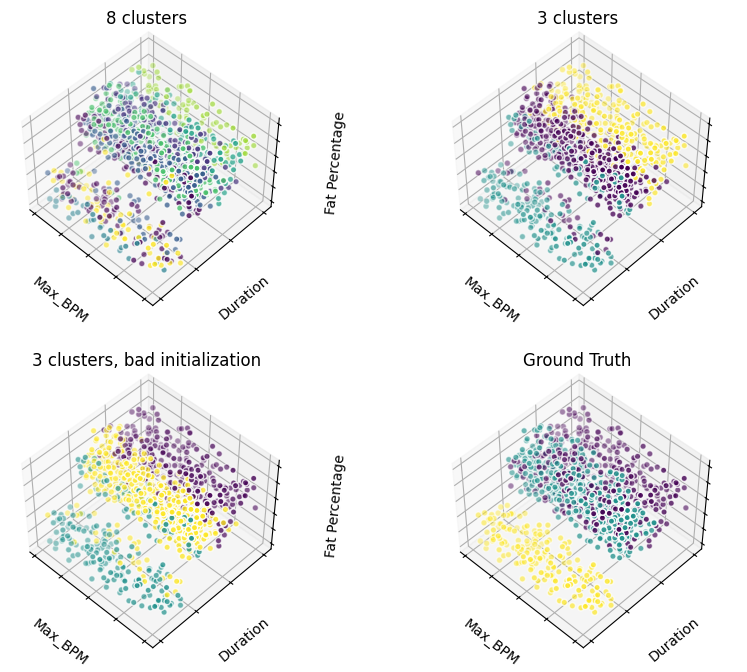

In [38]:
fig = plt.figure(figsize=(10, 8))
titles = ["8 clusters", "3 clusters", "3 clusters, bad initialization"]
for idx, ((name, est), title) in enumerate(zip(estimators, titles)):
    ax = fig.add_subplot(2, 2, idx + 1, projection="3d", elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(X["Max_BPM"], X["Dur"], X["Fat"], c=labels.astype(float), edgecolor="w")

    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    ax.set_xlabel("Max_BPM")
    ax.set_ylabel("Duration")
    ax.set_zlabel("Fat Percentage")
    ax.set_title(title)

# Plot the ground truth
ax = fig.add_subplot(2, 2, 4, projection="3d", elev=48, azim=134)
ax.scatter(X["Max_BPM"], X["Dur"], X["Fat"], c=y, edgecolor="w")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])
ax.set_xlabel("Max_BPM")
ax.set_ylabel("Duration")
ax.set_zlabel("Fat Percentage")
ax.set_title("Ground Truth")

plt.subplots_adjust(wspace=0.25, hspace=0.25)
plt.show()

При разбиении на 8 кластеров, данные делятся на множество близкорасположенных мелких групп, некоторые накладываются друг на друга. Можно сделать вывод, что 8 кластеров — многовато.

При разделении на 3 кластера более четко видно разделение между кластерами.

In [39]:
from sklearn import metrics
from sklearn.metrics.cluster import adjusted_rand_score


n_clusters = np.arange(2, 21)

In [40]:
best_metric = [0, 10000, 0,[]]

silhouette_score_values = []
adjusted_rand_score_values = []


for n in n_clusters:

    clusterer = KMeans(n_clusters=n, max_iter=10, n_init=10)
    clusterer.fit(X)
    y_pred = clusterer.predict(X)

    score1 = metrics.silhouette_score(X, y_pred)
    silhouette_score_values.append(score1)

    score2 = metrics.adjusted_rand_score(y, y_pred)
    adjusted_rand_score_values.append(score2)


    if score1 < best_metric[1] and score2 > best_metric[2]:
          best_metric[1] = score1
          best_metric[2] = score2
          best_metric[3] = clusterer.cluster_centers_
          best_metric[0] = n

In [41]:
best_metric

[3,
 0.5027587840155082,
 0.24060115528987105,
 array([[4.03800000e+01, 4.60000000e-01, 7.28866667e+01, 1.71663333e+00,
         1.79953333e+02, 1.38280000e+02, 6.24700000e+01, 8.89266667e-01,
         6.00646667e+02, 1.51666667e+00, 2.79716667e+01, 2.45000000e+00,
         2.77666667e+00, 2.47361333e+01],
        [3.59867841e+01, 6.56387665e-01, 7.71356828e+01, 1.73823789e+00,
         1.80330396e+02, 1.50405286e+02, 6.27004405e+01, 1.66616740e+00,
         1.27585463e+03, 1.55506608e+00, 1.79872247e+01, 3.03568282e+00,
         4.12334802e+00, 2.56534802e+01],
        [3.89147982e+01, 5.02242152e-01, 7.28358744e+01, 1.71860987e+00,
         1.79609865e+02, 1.44078475e+02, 6.18139013e+01, 1.29484305e+00,
         9.21890135e+02, 1.44843049e+00, 2.65197309e+01, 2.53721973e+00,
         3.28026906e+00, 2.46531839e+01]])]

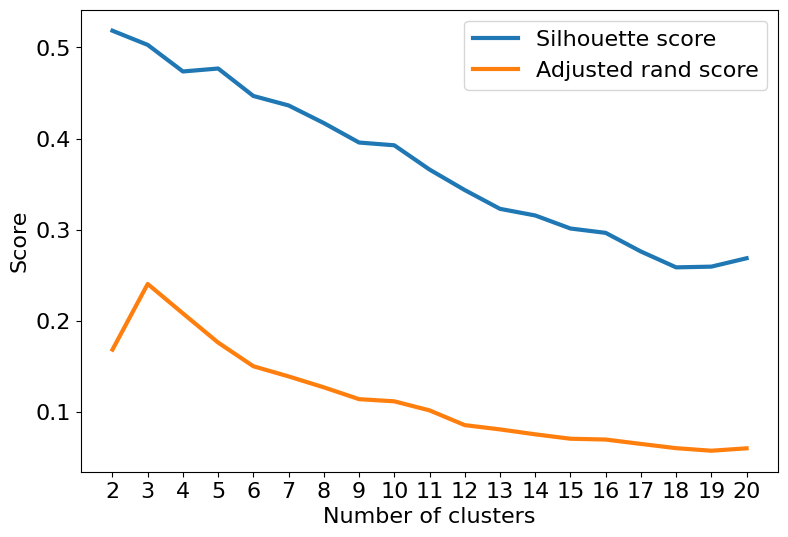

In [42]:
plt.figure(figsize=(9, 6))
plt.plot(n_clusters, silhouette_score_values, linewidth=3, label='Silhouette score')
plt.plot(n_clusters, adjusted_rand_score_values, linewidth=3, label='Adjusted rand score')
plt.xlabel('Number of clusters', size=16)
plt.ylabel('Score', size=16)
plt.xticks(n_clusters, size=16)
plt.yticks(size=16)
plt.legend(loc='best', fontsize=16)

plt.show()

Пик индекса Рэнда и относительно высокое значение силуэтного коэф-та наблюдаются при количестве кластеров равном 3. Вероятно, 3 кластера - лучший вариант кластеризации.

# Иерархическая

In [43]:
from scipy.cluster.hierarchy import linkage, dendrogram

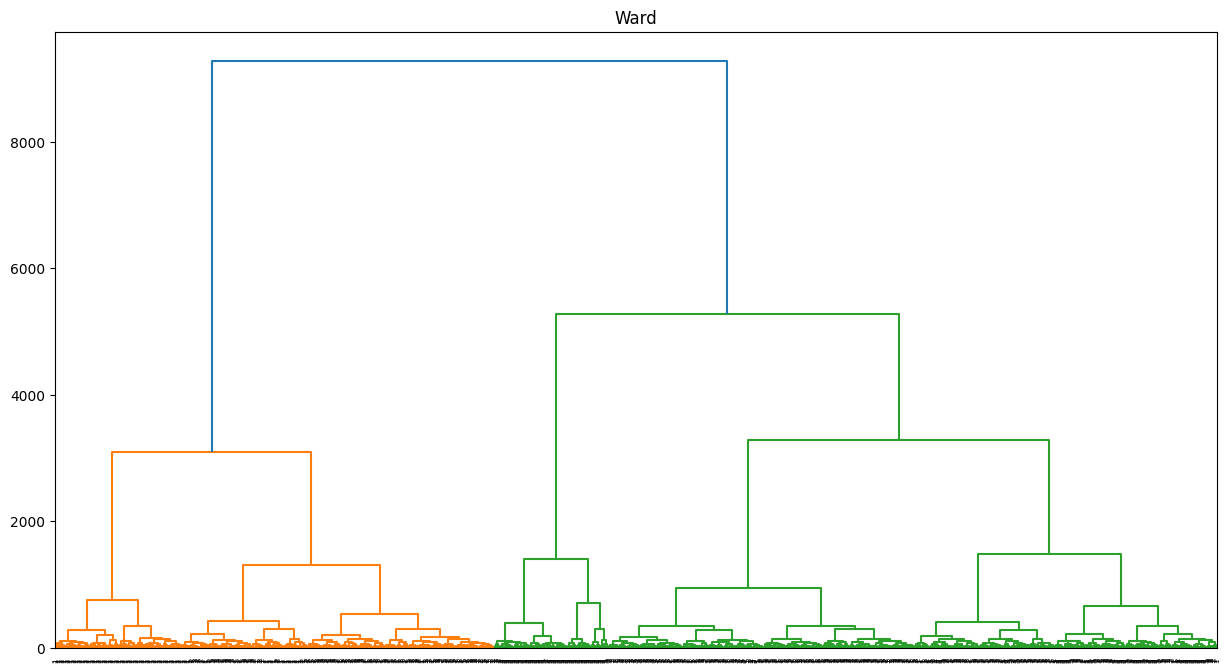

In [51]:
samples = X.values

# Реализация иерархической кластеризации при помощи функции linkage
mergings = linkage(samples, method='ward')

plt.figure(figsize=(15, 8))
plt.title('Ward')
# Строим дендрограмму, указав параметры удобные для отображения
dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

In [200]:
X_ = df.copy()

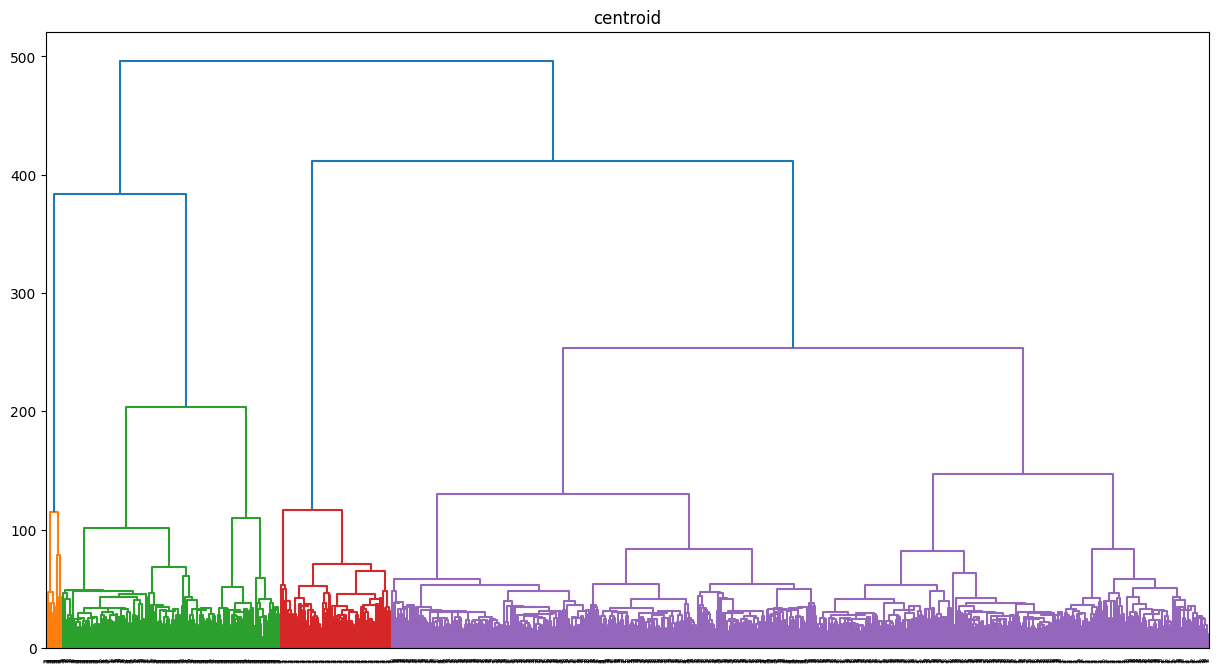

In [55]:
samples = X.values

mergings = linkage(samples, method='centroid')

plt.figure(figsize=(15, 8))
plt.title('centroid')

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

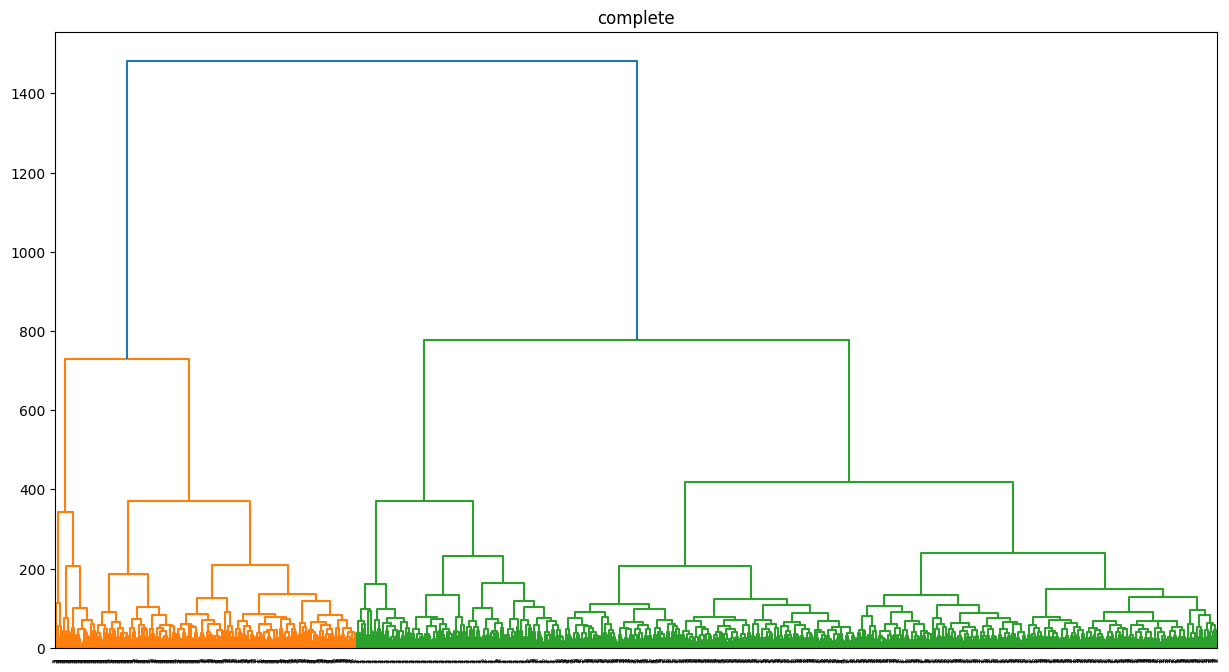

In [54]:
mergings = linkage(samples, method='complete')

plt.figure(figsize=(15, 8))
plt.title('complete')

dendrogram(mergings,
           labels=list(y),
           leaf_rotation=90,
           leaf_font_size=5
           )
plt.show()

# DBSCAN

In [216]:
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn import datasets

In [227]:
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_), index = X_.index, columns=X_.columns)

In [228]:
mins = X_.shape[1]

In [247]:
db = DBSCAN(eps=0.6, min_samples=10).fit(X_scaled)

labels = db.labels_
unique_labels = set(labels)
unique_labels

{-1, 0, 1, 2, 3}

In [248]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

['r', 'b', 'c', 'g']


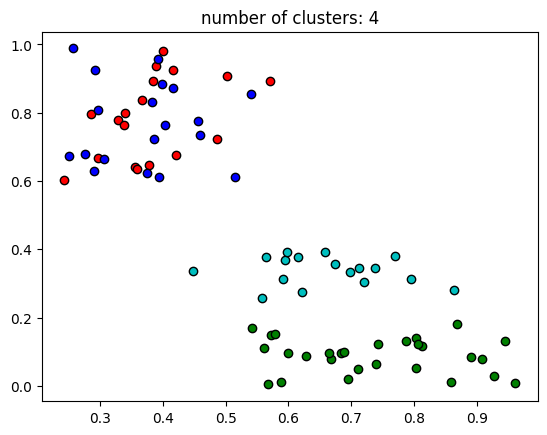

In [253]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

colors = ['r', 'b', 'c', 'g']
print(colors)
for k, col in zip(unique_labels, colors):
  if k == -1:
    col = 'k'
  class_member_mask = (labels == k)

  xy = X_scaled[class_member_mask & core_samples_mask]
  plt.plot(xy["Kcal"], xy["Fat"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

  xy = X_scaled[class_member_mask & ~core_samples_mask]
  plt.plot(xy["Kcal"], xy["Fat"], 'o', markerfacecolor=col,
			markeredgecolor='k',
			markersize=6)

plt.title('number of clusters: %d' % n_clusters_)
plt.show()

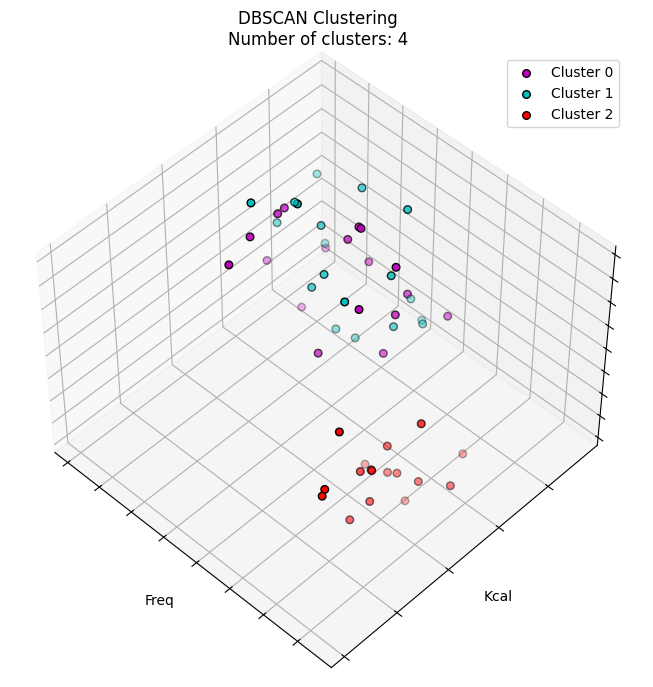

In [255]:
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(1, 1, 1, projection="3d", elev=48, azim=134)

unique_labels = set(labels)
colors = ['m', 'c', 'r']

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = 'w'

    class_member_mask = (labels == k)

    xy_core = X[class_member_mask & core_samples_mask]
    ax.scatter(xy_core["Fat"], xy_core["Kcal"], xy_core["Avg_BPM"], c=col, edgecolor="k", s=30, label=f"Cluster {k}" if k != -1 else "Noise")

    xy_noncore = X[class_member_mask & ~core_samples_mask]
    ax.scatter(xy_noncore["Fat"], xy_noncore["Kcal"], xy_noncore["Avg_BPM"], c=col, edgecolor="k", s=30)

ax.set_xlabel("Freq")
ax.set_ylabel("Kcal")
ax.set_zlabel("Avg_BPM")
ax.set_title(f"DBSCAN Clustering\nNumber of clusters: {n_clusters_}")
ax.xaxis.set_ticklabels([])
ax.yaxis.set_ticklabels([])
ax.zaxis.set_ticklabels([])

plt.legend()
plt.show()

In [258]:
from sklearn import metrics
from sklearn.metrics import adjusted_rand_score
import numpy as np

labels_filtered = labels[labels != -1]  # Исключаем шум
X_filtered = X[labels != -1]  # Исключаем шум из данных

sc = metrics.silhouette_score(X_filtered, labels_filtered)
print("Silhouette Coefficient: %0.2f" % sc)
ari = adjusted_rand_score(y, labels)
print("Adjusted Rand Index: %0.2f" % ari)

Silhouette Coefficient: -0.01
Adjusted Rand Index: 0.04
